# Compare FixN_def_z0 LES Sims
## Updated as of 5/14/24
* The below notebook allows one to compare large-eddy simulations.
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [1]:
%run functions_plotting.py

keyword_all = 'FixN_def_z0.'
sim_keyword_dharma = 'dharma/sandbox/DHARMA_Lx25_dx100_'+keyword_all
sim_keyword_icon = 'icon/staged/ICON_Lx25_dx100_'+keyword_all
sim_keyword_sam = 'sam-pnnl/sandbox/SAM_Lx25_dx100_'+keyword_all
sim_keyword_ucla = 'uclales-salsa/sandbox/UCLALES-SALSA_Lx25_dx100_'+keyword_all
sim_keyword_wrf = 'wrf/sandbox/WRF_Lx25_dx100_'+keyword_all

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=0&format=xlsx',
                              sheet_name='Mean')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, height'])

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])
var_vec_2d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time, height'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, height'])

In [3]:
df_col_1d_dharma,df_col_2d_dharma = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_dharma,diag_zi_ctt=True)
df_col_1d_icon,df_col_2d_icon = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_icon,diag_zi_ctt=True)
df_col_1d_sam,df_col_2d_sam = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_sam,diag_zi_ctt=True)
df_col_1d_ucla,df_col_2d_ucla = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_ucla,diag_zi_ctt=True)
df_col_1d_wrf,df_col_2d_wrf = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_wrf,diag_zi_ctt=True)

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
na1 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
na2 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
na3 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
dna_micro_warm shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
dna_micro_cold shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
dna_turb shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.nc
computing inversion height, cloud-top height, and cloud-top temperature
using liquid(-ice) potential temperature
dharma/sandbox/DHARMA_Lx25_dx100_FixN_def_z0.

In [4]:
var_vec_2d

array(['pa', 'ua', 'va', 'rhoa', 'ta', 'qv', 'hur', 'huri', 'theta',
       'tke_res', 'tke_sgs', 'qlc', 'qlr', 'qic', 'qis', 'qig', 'nlc',
       'nlr', 'nic', 'nis', 'nig', 'na1', 'na2', 'na3', 'nlcic', 'niic',
       'eps', 'uw', 'vw', 'w2', 'wth', 'vf_thli', 'wqv', 'vf_qt', 'flc',
       'prf', 'prfi', 'rld', 'rlu', 'dth_rad', 'dth_micro', 'dth_turb',
       'dq_micro', 'dq_turb', 'dna_micro_warm', 'dna_micro_cold',
       'dna_turb', 'dni_het', 'dni_sip', 'dni_hom'], dtype=object)

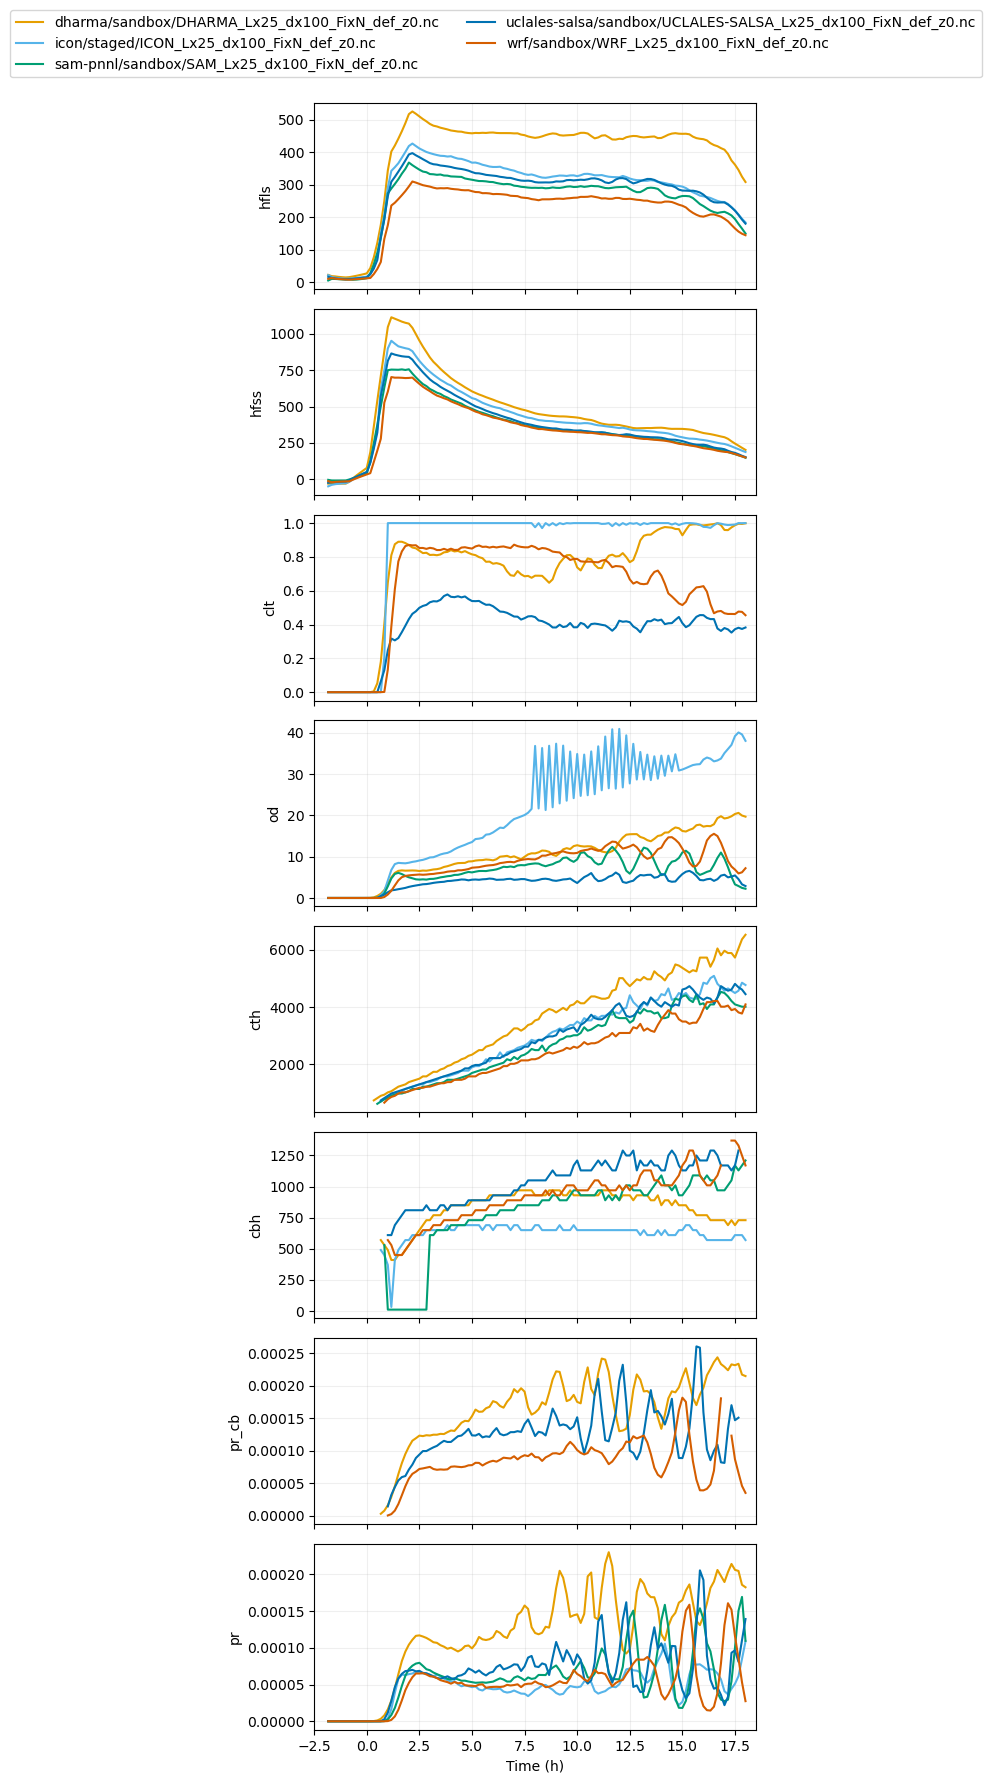

In [5]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d_dharma,df_col_1d_wrf,df_col_1d_icon,df_col_1d_sam,df_col_1d_ucla]),
                   ['hfls','hfss','clt','od','cth','cbh','pr_cb','pr'])

In [6]:
df_col_1d_dharma.time

0.166667     -6600.0
0.333333     -6000.0
0.500000     -5400.0
0.666667     -4800.0
0.833333     -4200.0
              ...   
19.333333    62400.0
19.500000    63000.0
19.666667    63600.0
19.833333    64200.0
20.000000    64800.0
Name: time, Length: 120, dtype: float64

Text(0.5, 1.0, 'Surface Fluxes Dictate MBL Deepening')

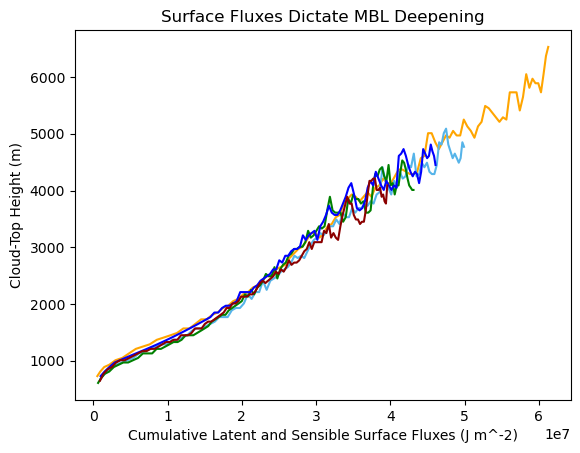

In [8]:
## inversion height scales with surface energy input
plt.plot(df_col_1d_dharma['hfls'].cumsum()*600 + df_col_1d_dharma['hfss'].cumsum()*600,df_col_1d_dharma['cth'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600 + df_col_1d_icon['hfss'].cumsum()*600,df_col_1d_icon['cth'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600 + df_col_1d_sam['hfss'].cumsum()*600,df_col_1d_sam['cth'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600 + df_col_1d_ucla['hfss'].cumsum()*600,df_col_1d_ucla['cth'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600 + df_col_1d_wrf['hfss'].cumsum()*600,df_col_1d_wrf['cth'],c='darkred')
plt.xlabel('Cumulative Latent and Sensible Surface Fluxes (J m^-2)')
plt.ylabel('Cloud-Top Height (m)') 
plt.title('Surface Fluxes Dictate MBL Deepening')


Text(0.5, 1.0, 'Surface Fluxes Somewhat Dictate Cloud Base')

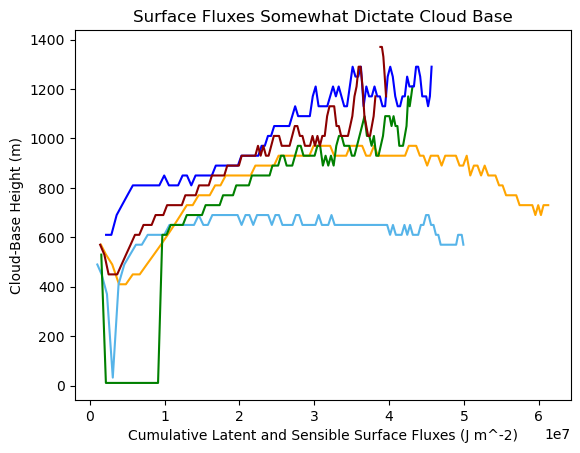

In [10]:
## cloud base height
#plt.plot(df_col_1d_dharma['hfls'].cumsum() + df_col_1d_dharma['hfss'].cumsum(),df_col_1d_dharma['cbh'],c='orange')
#plt.plot(df_col_1d_wrf['hfls'].cumsum() + df_col_1d_wrf['hfss'].cumsum(),df_col_1d_wrf['cbh'])

plt.plot(df_col_1d_dharma['hfls'].cumsum()*600  + df_col_1d_dharma['hfss'].cumsum()*600 ,df_col_1d_dharma['cbh'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600  + df_col_1d_icon['hfss'].cumsum()*600 ,df_col_1d_icon['cbh'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600  + df_col_1d_sam['hfss'].cumsum()*600 ,df_col_1d_sam['cbh'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600  + df_col_1d_ucla['hfss'].cumsum()*600 ,df_col_1d_ucla['cbh'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600  + df_col_1d_wrf['hfss'].cumsum()*600 ,df_col_1d_wrf['cbh'],c='darkred')
plt.xlabel('Cumulative Latent and Sensible Surface Fluxes (J m^-2)')
plt.ylabel('Cloud-Base Height (m)') 
plt.title('Surface Fluxes Somewhat Dictate Cloud Base')

Text(0.5, 1.0, 'Surface Fluxes Somewhat Dictate Cloud Cover')

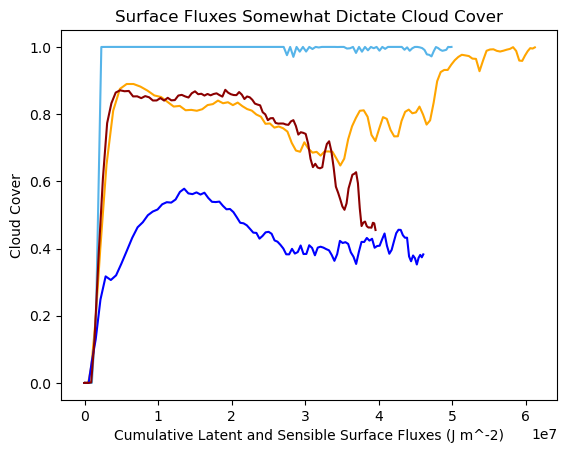

In [14]:
## cloud cover lines up
#plt.plot(df_col_1d_dharma['hfls'].cumsum()+df_col_1d_dharma['hfss'].cumsum(),df_col_1d_dharma['clt'],c='orange')
#plt.plot(df_col_1d_wrf['hfls'].cumsum()+df_col_1d_wrf['hfss'].cumsum(),df_col_1d_wrf['clt'])

plt.plot(df_col_1d_dharma['hfls'].cumsum()*600  + df_col_1d_dharma['hfss'].cumsum()*600 ,df_col_1d_dharma['clt'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600  + df_col_1d_icon['hfss'].cumsum()*600 ,df_col_1d_icon['clt'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600  + df_col_1d_sam['hfss'].cumsum()*600 ,df_col_1d_sam['clt'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600  + df_col_1d_ucla['hfss'].cumsum()*600 ,df_col_1d_ucla['clt'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600  + df_col_1d_wrf['hfss'].cumsum()*600 ,df_col_1d_wrf['clt'],c='darkred')
plt.xlabel('Cumulative Latent and Sensible Surface Fluxes (J m^-2)')
plt.ylabel('Cloud Cover') 
plt.title('Surface Fluxes Somewhat Dictate Cloud Cover')

Text(0.5, 1.0, 'Surface Fluxes Somewhat Dictate IWP')

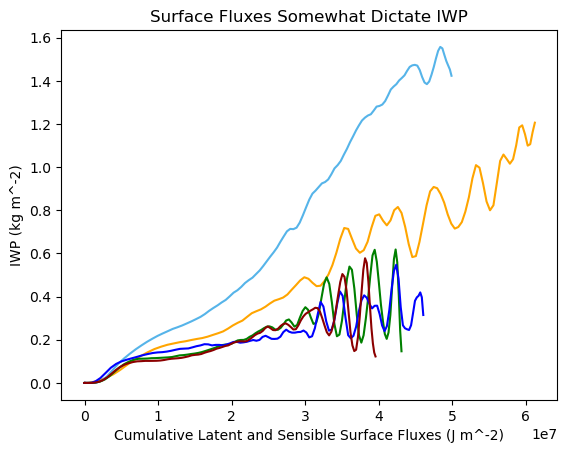

In [13]:

plt.plot(df_col_1d_dharma['hfls'].cumsum()*600  + df_col_1d_dharma['hfss'].cumsum()*600 ,df_col_1d_dharma['iwp'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600  + df_col_1d_icon['hfss'].cumsum()*600 ,df_col_1d_icon['iwp'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600  + df_col_1d_sam['hfss'].cumsum()*600 ,df_col_1d_sam['iwp'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600  + df_col_1d_ucla['hfss'].cumsum()*600 ,df_col_1d_ucla['iwp'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600  + df_col_1d_wrf['hfss'].cumsum()*600 ,df_col_1d_wrf['iwp'],c='darkred')
plt.xlabel('Cumulative Latent and Sensible Surface Fluxes (J m^-2)')
plt.ylabel('IWP (kg m^-2)') 
plt.title('Surface Fluxes Somewhat Dictate IWP')

Text(0.5, 1.0, 'IWP Drives Precipitation')

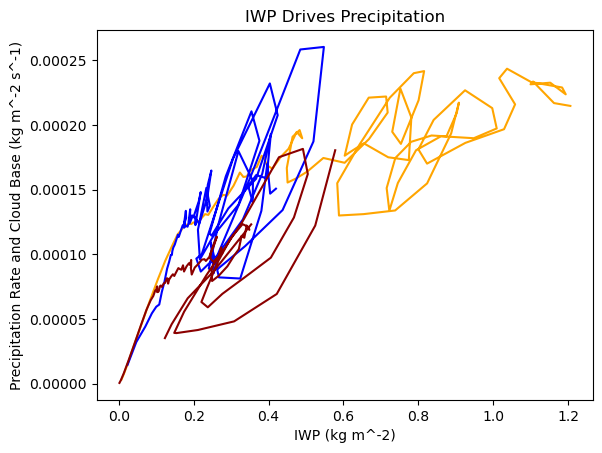

In [19]:
## any ice make for precip (here at cloud-base)
#plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['pr_cb'],c='orange')
#plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['pr_cb'])

plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['pr_cb'],c='orange')
plt.plot(df_col_1d_icon['iwp'],df_col_1d_icon['pr_cb'],c='#56B4E9')
plt.plot(df_col_1d_sam['iwp'],df_col_1d_sam['pr_cb'],c='green')
plt.plot(df_col_1d_ucla['iwp'],df_col_1d_ucla['pr_cb'],c='blue')
plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['pr_cb'],c='darkred')
plt.xlabel('IWP (kg m^-2)')
plt.ylabel('Precipitation Rate and Cloud Base (kg m^-2 s^-1)') 
plt.title('IWP Drives Precipitation')

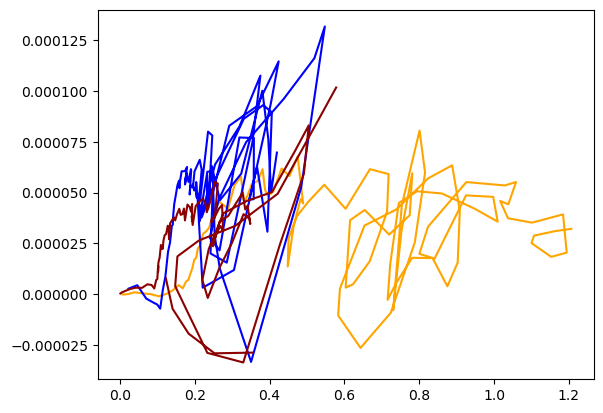

In [76]:
## the sub-cloud evaporated/sublimated amout is roughly similar
#plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['pr_cb']-df_col_1d_dharma['pr'],c='orange')
#plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['pr_cb']-df_col_1d_wrf['pr'])

plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['pr_cb']-df_col_1d_dharma['pr'],c='orange')
plt.plot(df_col_1d_icon['iwp'],df_col_1d_icon['pr_cb']-df_col_1d_icon['pr'],c='#56B4E9')
plt.plot(df_col_1d_sam['iwp'],df_col_1d_sam['pr_cb']-df_col_1d_sam['pr'],c='green')
plt.plot(df_col_1d_ucla['iwp'],df_col_1d_ucla['pr_cb']-df_col_1d_ucla['pr'],c='blue')
plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['pr_cb']-df_col_1d_wrf['pr'],c='darkred')

Text(0.5, 1.0, 'IWP Increases MBL WVP Stratification')

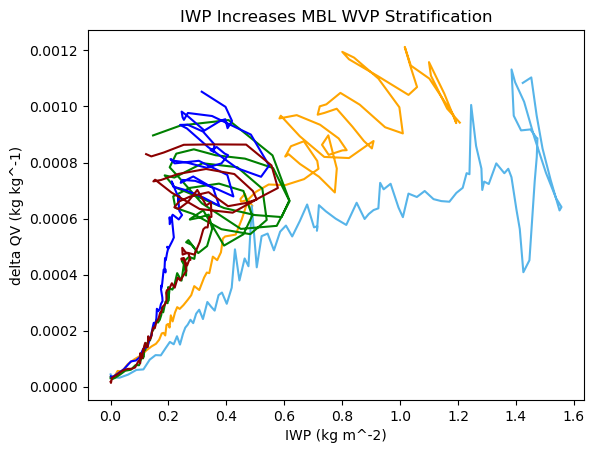

In [25]:
## earlier and more intense MBL stratification
#plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['delta'],c='orange')
#plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['delta'])

plt.plot(df_col_1d_dharma['iwp'],df_col_1d_dharma['delta'],c='orange')
plt.plot(df_col_1d_icon['iwp'],df_col_1d_icon['delta'],c='#56B4E9')
plt.plot(df_col_1d_sam['iwp'],df_col_1d_sam['delta'],c='green')
plt.plot(df_col_1d_ucla['iwp'],df_col_1d_ucla['delta'],c='blue')
plt.plot(df_col_1d_wrf['iwp'],df_col_1d_wrf['delta'],c='darkred')
plt.xlabel('IWP (kg m^-2)')
plt.ylabel('delta QV (kg kg^-1)') 
plt.title('IWP Increases MBL WVP Stratification')

Text(0.5, 1.0, 'Surface Fluxes Dictate MBL Stratification')

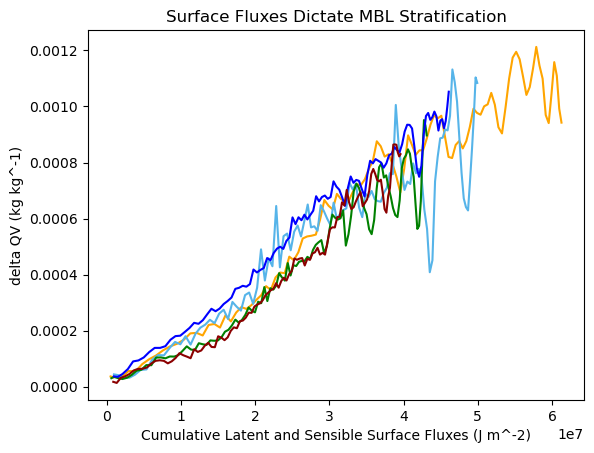

In [16]:
## in essence, cumulative surface fluxes dictate amount of stratification
#plt.plot(df_col_1d_dharma['hfls'].cumsum()+df_col_1d_dharma['hfss'].cumsum(),df_col_1d_dharma['delta'],c='orange')
#plt.plot(df_col_1d_wrf['hfls'].cumsum()+df_col_1d_wrf['hfss'].cumsum(),df_col_1d_wrf['delta'])

plt.plot(df_col_1d_dharma['hfls'].cumsum()*600  + df_col_1d_dharma['hfss'].cumsum()*600 ,df_col_1d_dharma['delta'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600  + df_col_1d_icon['hfss'].cumsum()*600 ,df_col_1d_icon['delta'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600  + df_col_1d_sam['hfss'].cumsum()*600 ,df_col_1d_sam['delta'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600  + df_col_1d_ucla['hfss'].cumsum()*600 ,df_col_1d_ucla['delta'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600  + df_col_1d_wrf['hfss'].cumsum()*600 ,df_col_1d_wrf['delta'],c='darkred')
plt.xlabel('Cumulative Latent and Sensible Surface Fluxes (J m^-2)')
plt.ylabel('delta QV (kg kg^-1)') 
plt.title('Surface Fluxes Dictate MBL Stratification')

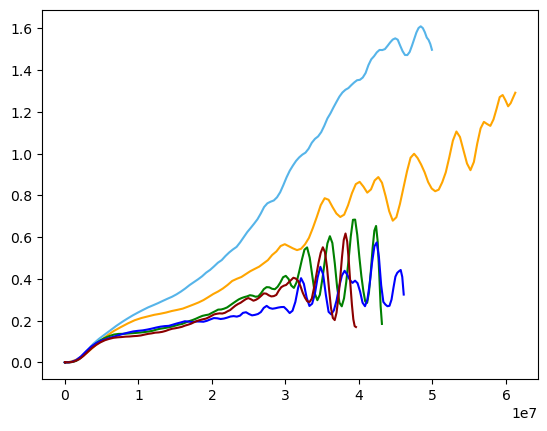

In [17]:
## cloud condensate deviates (and perhaps that would change when using prognostic aerosol)
#plt.plot(df_col_1d_dharma['hfls'].cumsum()+df_col_1d_dharma['hfss'].cumsum(),df_col_1d_dharma['lwp']+df_col_1d_dharma['iwp'],c='orange')
#plt.plot(df_col_1d_wrf['hfls'].cumsum()+df_col_1d_wrf['hfss'].cumsum(),df_col_1d_wrf['lwp']+df_col_1d_wrf['iwp'])

plt.plot(df_col_1d_dharma['hfls'].cumsum()*600  + df_col_1d_dharma['hfss'].cumsum()*600 ,df_col_1d_dharma['lwp']+df_col_1d_dharma['iwp'],c='orange')
plt.plot(df_col_1d_icon['hfls'].cumsum()*600  + df_col_1d_icon['hfss'].cumsum()*600 ,df_col_1d_icon['lwp']+df_col_1d_icon['iwp'],c='#56B4E9')
plt.plot(df_col_1d_sam['hfls'].cumsum()*600  + df_col_1d_sam['hfss'].cumsum()*600 ,df_col_1d_sam['lwp']+df_col_1d_sam['iwp'],c='green')
plt.plot(df_col_1d_ucla['hfls'].cumsum()*600  + df_col_1d_ucla['hfss'].cumsum()*600 ,df_col_1d_ucla['lwp']+df_col_1d_ucla['iwp'],c='blue')
plt.plot(df_col_1d_wrf['hfls'].cumsum()*600  + df_col_1d_wrf['hfss'].cumsum()*600 ,df_col_1d_wrf['lwp']+df_col_1d_wrf['iwp'],c='darkred')

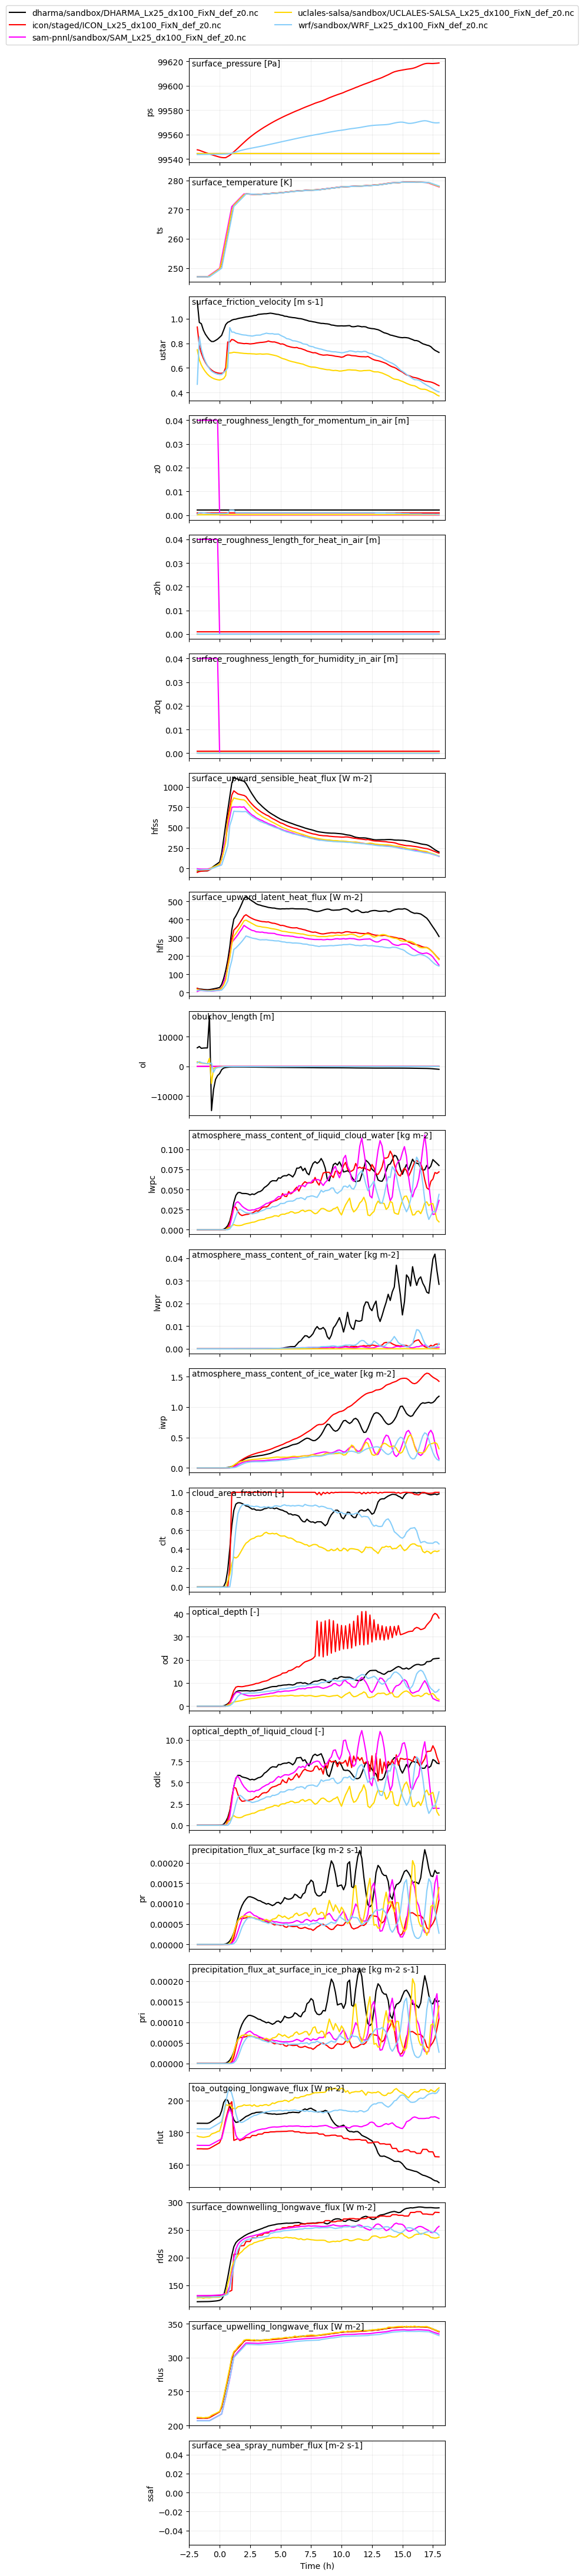

In [36]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d_dharma,df_col_1d_icon,df_col_1d_sam,df_col_1d_ucla,df_col_1d_wrf]),
                   var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units,
                   plot_colors=['k','r','magenta','gold','lightskyblue'],plot_ls=['-','-','-','-','-'])

temporal averaging over 1.0 h interval


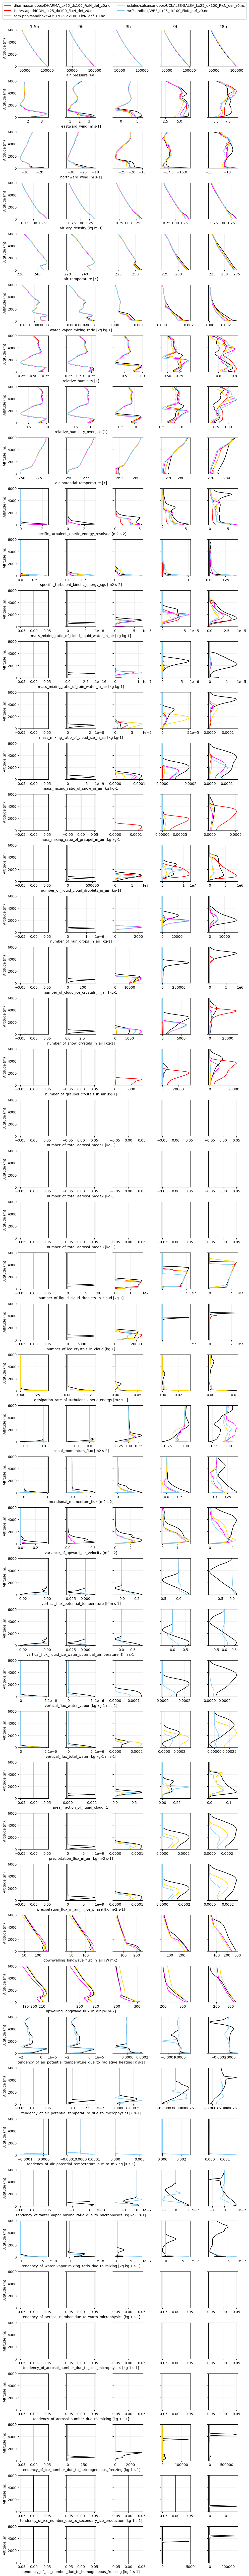

<Figure size 1000x600 with 0 Axes>

In [47]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d_dharma,df_col_2d_icon,df_col_2d_sam,df_col_2d_ucla,df_col_2d_wrf]),
                   var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units,longnames=var_vec_2d_long,
                   plot_colors=['k','r','magenta','gold','lightskyblue'])